In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Q1) Perform data loading, preprocessing by dropping any rows with 'NaN' values in the 'Class' column.

In [4]:
#Load the dataset
df = pd.read_csv('creditcard.csv')

#Print first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Print last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
#Print the dimension of the dataset
df.shape

(284807, 31)

#### This dataset has 284807 rows and 31 columns in which the first 30 columns are features and the last column is target variable(class label)

In [7]:
# Count the number of missing values in 'Class'
missing_count = df['Class'].isna().sum()
print(f"Missing values in Class column: {missing_count}")

Missing values in Class column: 0


#### There are no missing values in Class column

In [8]:
value_counts = df['Class'].value_counts()
print("Value counts in Class column:\n", value_counts)

Value counts in Class column:
 Class
0    284315
1       492
Name: count, dtype: int64


#### There are only 2 values in Class column. Which means there are 2 class labels 0 and 1

In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no missing values in any of the columns

### Q2) Split the dataset into features (X) and the target variable (y), and further divide into training and test sets. [Consider test_size=0.2] 

In [10]:
#Drop class column and take the remaining columns as features/attributes (X)
X = df.drop('Class', axis =1).values

#Take the class column as target variable (y)
y = df['Class'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Divide the data into training and test with test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Q3) Perform data scaling and modelling. Also, fine tune the value of k. [3M]

The K-Nearest Neighbors model has to be initialized, trained on the training data, and subsequently use it to make predictions on the test data. Initialize the model with k=5.

#### Data Scaling

In [13]:
#Using MinMaxScaler because it works well with algorithms that use distance metrics (e.g., k-nearest neighbors, neural networks).
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Data Modelling

In [14]:
from sklearn.neighbors import KNeighborsClassifier

##First lets construct a model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

#Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
knn.score(X_test, y_test)

0.9992451107756047

### Now lets fine tune the value of k

In [16]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors) :
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    print("Training accuracy for", i+1, "is", train_accuracy[i])

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    print("Accuracy for", i+1, "is", test_accuracy[i])

Training accuracy for 1 is 1.0
Accuracy for 1 is 0.9991748885221726
Training accuracy for 2 is 0.99961816146942
Accuracy for 2 is 0.9992626663389628
Training accuracy for 3 is 0.9996313283153021
Accuracy for 3 is 0.9992626663389628
Training accuracy for 4 is 0.9995611051372644
Accuracy for 4 is 0.9992451107756047
Training accuracy for 5 is 0.9995391603941276
Accuracy for 5 is 0.9992451107756047
Training accuracy for 6 is 0.9995128267023634
Accuracy for 6 is 0.9992099996488887
Training accuracy for 7 is 0.9994996598564814
Accuracy for 7 is 0.9991924440855307
Training accuracy for 8 is 0.9994689372160899
Accuracy for 8 is 0.9991573329588147
Training accuracy for 9 is 0.9994777151133446
Accuracy for 9 is 0.9991397773954567
Training accuracy for 10 is 0.9994689372160899
Accuracy for 10 is 0.9991397773954567
Training accuracy for 11 is 0.9994689372160899
Accuracy for 11 is 0.9991397773954567
Training accuracy for 12 is 0.9994645482674626
Accuracy for 12 is 0.9991397773954567
Training accura

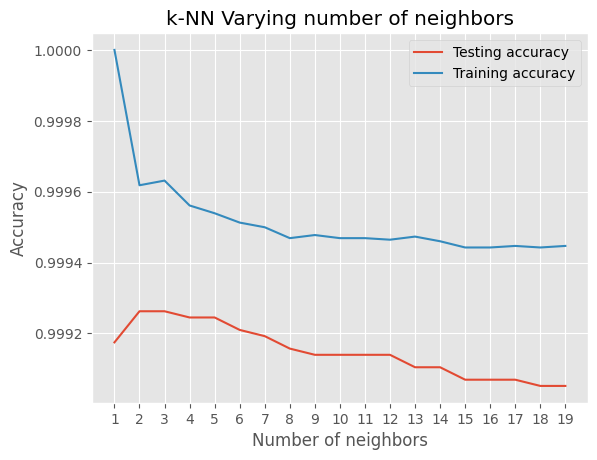

In [17]:
#Generate Plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xticks(range(1,20))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### From the above plot, we can see that when the number of neighbors (k) is 3 the accuracy is the highest. The accuracy reduces when the number of neighbors increases more than 3. Since the class label are imbalanced we can't take accuracy as an evaluation metric so we cant conclude that the 3 is the optimal value of k.

### Hyperparamter tuning

#### Since our data has less number of fraud transactions and more number of non-fraud transactions. Lets do hyperparameter tuning to identify the optimal value of k using cross validation method because it helps in improving model performance when there is an imbalance in class labels. Accoridng to me, in financial transactions we need to give equal importance to both false positive and false negative so we will use F1 score as an evlautation metric. 

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
X = scaler.fit_transform(X)

knn = KNeighborsClassifier()

param_grid = {'n_neighbors':np.arange(1,30)}

knn_cv = GridSearchCV(knn, param_grid=param_grid, scoring='f1', cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='f1')

In [32]:
print("Best F1 score:", knn_cv.best_score_)

Best F1 score: 0.7748815165329945


In [35]:
print("Optimal k value:", knn_cv.best_params_['n_neighbors'])

Optimal k value: 7


#### Lets construct a model with k = 7.

In [45]:
knn = KNeighborsClassifier(n_neighbors=7)

#Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [46]:
y_pred = knn.predict(X_test)

### Q4) Evaluate the model performance using a classification report and accuracy score

In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9991924440855307


In [48]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.58      0.71        98

    accuracy                           1.00     56962
   macro avg       0.96      0.79      0.86     56962
weighted avg       1.00      1.00      1.00     56962



**Plotting ROC (Receiver operating characteristic curve) to evaluate the model performance**

In [57]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
for i in range(10) :
    print(y_test[i], y_pred[i], y_pred_proba[i])

0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0


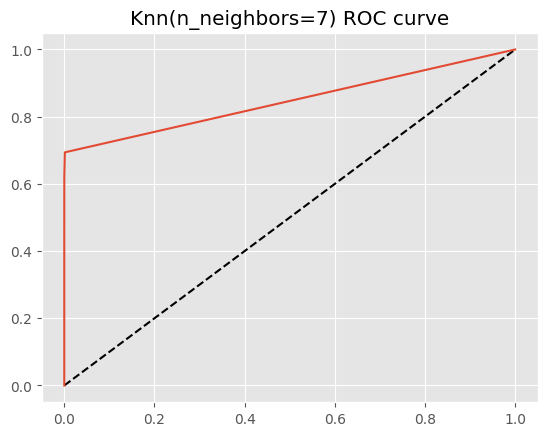

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

### Q5) Plot a confusion matrix as a heatmap, offering a visual representation of the model's performance, illustrating True Positives, True Negatives, False Positives, and False Negatives.

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56859     5]
 [   41    57]]


In [53]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,56859,5,56864
1,41,57,98
All,56900,62,56962


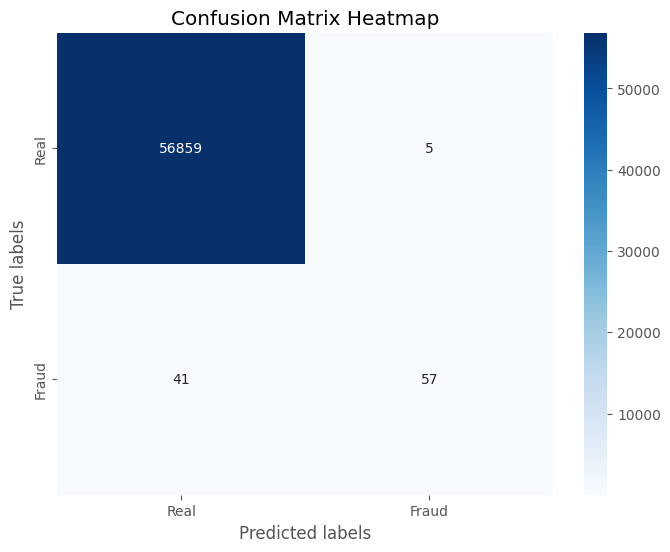

In [55]:
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real','Fraud'] , yticklabels=['Real','Fraud'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

##### 1. True postives : The number of transactions which is actually a fraud and have been correctly predicted as fraud = 57
##### 2. False postives : The number of transactions which is actually a legitimate one but have been predicted as fraud = 41
##### 3. True negatives : The number of transactions which is actually a legitimate one and have been correctly predicted as legitimate = 56859
##### 4. False negatives : The number of transactions which is actually a fraud but have been predicted as legitimate = 5

### Q6) Write some conclusion on how K-Nearest Neighbors implementation serves as an efficient solution for credit card fraud detection.

K-Nearest Neighbors is a straight forward algorithm and hence it is easy to understand. It offers a robust, adaptable, and interpretable solution for credit card fraud detection. Its ability to handle imbalanced data, coupled with its simplicity and flexibility, makes it a valuable tool in identifying fraudulent transactions. Using this the financial institutions can effectively combat fraud and enhance security measures.